<a href="https://colab.research.google.com/github/jccrews256/ST-554-Project1-Template/blob/main/Task2/Task_2_Project_1_(Lead_Trevor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Big Data - NCSU ST 554
## Project 1
### Task 2 - Exploratory Data Analysis

##### Group Members:
+ Trevor Lillywhite (primary contributor to Task 2)
+ Cass Crews
+ Joy Zhou

##### Due Date: 2/23 (soft), 2/25 (hard)

##### Task Overview:

The overall objective of this notebook is to conduct extensive Exploratory Data Analysis (EDA) on a dataset to understand relationships between sensor and weather variables vs. the "ground truth" concentration of benzene.

The dataset of interest is the "Air Quality" dataset from the UC Irvine Machine Learning Repository, available here:  
+ https://archive.ics.uci.edu/dataset/360/air+quality
This data consists of time series data (data recorded over time) for air quality measurements in Italy, as described in this paper:
+ https://www.semanticscholar.org/paper/On-field-calibration-of-an-electronic-nose-for-in-Vito-Massera/a90a54a39ff934772df57771a0012981f355949d

The authors of the paper sought a method to infer the environmental benzene concentration in an urban setting by correlating benzene levels with measurements of other species that can be more easily and economically measured, as well as weather-related measurements.
+ `PT08.S1 (CO)` for carbon monoxide
+ `PT08.S2 (NMHC)` for non-methanic hydrocarbons
    - (note that "methanic" was incorrectly spelled as "metanic" in the paper)
+ `PT08.S3 (NOx)` for total nitrogen oxides
+ `PT08.S4 (NO2)` for nitrogen dioxide
+ `PT08.S5 (O3)` for ozone
+ `T` for temperature
+ `RH` for relative humidity
+ `AH` for absolute humidity

The benzene concentration was directly measured using sophisticated sensors that cannot be widely deployed due to cost and complexity. Other "ground truth" measurements were also taken and are included in the dataset (CO, NMHC, NOx, NO2) but can be ignored for the sake of this analysis.

This notebook will include many EDA elements, including (but not limited to):
+ Numeric summaries of the benzene (`C6H6 (GT)`) variable at different levels/combinations of other variables
+ Correlations between variables
+ Plots of the `C6H6 (GT)` variable, showing relationships with other variables
+ Relationships over time or ignoring time.

Sufficient narrative will be provided to give the reader insights into the thought processes and conclusions reached from EDA.

#### Read in Dataset

First, we will import relevant `python` libraries to enable our subsequent analysis.

In [15]:
# Import standard data analysis libraries
import pandas as pd                     # Convenient data structuring (DataFrames)
import numpy as np                      # Numerical tools (e.g., arrays)
from matplotlib import pyplot as plt    # Plotting tools
import seaborn as sns                   # Alternative plotting tools

Next, we will install the UCI Machine Learning Repository via a `pip install` command and then fetch the specific dataset of interest.

In [16]:
!pip install ucimlrepo                      # Installs repository of datasets
import ucimlrepo as uci                     # Imports newly installed library
air_quality = uci.fetch_ucirepo(id=360)     # Fetches dataset of interest

Now that we have a variable `air_quality` with the desired dataset, let's look at the data! We will start with looking at object type and then using the `features` attribute to tell us the column names. Then we will look at some basic statistics and example rows (observations) before making any changes.  

In [17]:
# Show object data type
type(air_quality)

ucimlrepo.dotdict.dotdict

In [18]:
# Show column names (features) and example rows
air_quality.data.features

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


This appears to be a dictionary-type object with 15 columns and 9357 rows.

To use some convenient data exploration features, we will convert this into a Pandas DataFrame.

In [19]:
df_air_quality = pd.DataFrame(air_quality.data.features)    # Convert to DataFrame
df_air_quality.info()                                       # View basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


All columns and rows were converted to a DataFrame data structure. Data types include `float64`, `int64`, and `object`.

Next, we will use the `describe()` method to show basic statistics on numeric-type columns.

In [20]:
df_air_quality.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


Our final step before cleaning the data will be to show a few example rows using the `head()` method to see precisely what the data looks like, especially the `object` type columns (Date and Time).

In [21]:
df_air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


#### Clean the Dataset

##### Drop extraneous columns

Because we don't care about the "ground truth" measurements besides benzene,
we can drop those extraneous columns to simplify the dataset.

In [22]:
# Drop extraneous columns
df_air_quality.drop(columns=['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)'],
                    inplace=True)   # inplace=True modifies original dataframe
df_air_quality.head(1)              # View column names and only one row

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578


##### Modify column names

Now, we can modify the column names for simplicity and convenience.

In [23]:
# Modify column names using dictionary for quality control
mod_col_names = {'PT08.S1(CO)':'CO',
                 'C6H6(GT)':'benzene',
                 'PT08.S2(NMHC)':'NMHC',
                 'PT08.S3(NOx)':'NOx',
                 'PT08.S4(NO2)':'NO2',
                 'PT08.S5(O3)':'O3'}
df_air_quality.rename(columns=mod_col_names, inplace=True)
df_air_quality.head(1)              # View column names and only one row

,Date,Time,CO,benzene,NMHC,NOx,NO2,O3,T,RH,AH
0,3/10/2004,18:00:00,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578


##### Create combined DateTime column

Because the date and time are recorded separately, we will create a new column
to combine date and time. This will help us see temporal trends more fully.

We will keep the original date and time columns to allow us to explore any hour-based periodic relationships.

In [25]:
# Create new DateTime column
df_air_quality['DateTime'] = df_air_quality.Date + ' ' + df_air_quality.Time
df_air_quality['DateTime'] = pd.to_datetime(df_air_quality.DateTime)
df_air_quality.head()

,Date,Time,CO,benzene,NMHC,NOx,NO2,O3,T,RH,AH,DateTime
0,3/10/2004,18:00:00,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,3/10/2004,19:00:00,1292,9.4,955,1174,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,3/10/2004,20:00:00,1402,9.0,939,1140,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,3/10/2004,21:00:00,1376,9.2,948,1092,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,3/10/2004,22:00:00,1272,6.5,836,1205,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00


##### Investigate and handle missing values

From the UCI documentation page, we know the dataset has missing values.
These were given a dummy value of -200.

Before dropping these rows, we need to see how widespread the missing data is.
This will inform our choice of dropping observations vs. imputing values.

In [27]:
# Investigate number of missing values
df_air_quality.describe()

,CO,benzene,NMHC,NOx,NO2,O3,T,RH,AH,DateTime
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357
mean,1048.990061,1.865683,894.595276,794.990168,1391.479641,975.072032,9.778305,39.485380,-6.837604,2004-09-21 16:00:00
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,2004-03-10 18:00:00
25%,921.000000,4.000000,711.000000,637.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,2004-06-16 05:00:00
50%,1053.000000,7.900000,895.000000,794.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,2004-09-21 16:00:00
75%,1221.000000,13.600000,1105.000000,960.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004-12-28 03:00:00
max,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005-04-04 14:00:00
std,329.832710,41.380206,342.333252,321.993552,467.210125,456.938184,43.203623,51.216145,38.976670,NaN


Each of the measurement values (everything except DateTime) has missing values because the minimum value for each column is -200. None of the 25% quartile values are -200, which means less than one quarter of each measurement is missing.

Let's count the number and percentage of missing values in each column.

In [30]:
for v in df_air_quality.columns:
    print(v, " Missing Value Count: ",
        (df_air_quality[v] == -200).sum(), " (",
        (100*(df_air_quality[v] == -200).sum()/(len(df_air_quality))).round(2),
        "%)", sep = "")


Date Missing Value Count: 0 (0.0%)
Time Missing Value Count: 0 (0.0%)
CO Missing Value Count: 366 (3.91%)
benzene Missing Value Count: 366 (3.91%)
NMHC Missing Value Count: 366 (3.91%)
NOx Missing Value Count: 366 (3.91%)
NO2 Missing Value Count: 366 (3.91%)
O3 Missing Value Count: 366 (3.91%)
T Missing Value Count: 366 (3.91%)
RH Missing Value Count: 366 (3.91%)
AH Missing Value Count: 366 (3.91%)
DateTime Missing Value Count: 0 (0.0%)


There are 366 missing values for each measurement column. This indicates that the entire system was likely offline for one or multiple periods of time, impacting all measurements simultaneously.

To investigate the timing of these apparent outages, we will plot the time-series missing values.

Text(0, 0.5, 'Measurement (arb. units)')

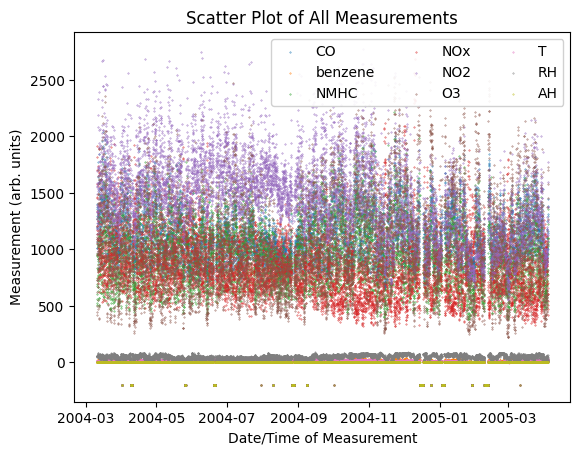

In [65]:
# Plot time-series missing values
df_measurements = df_air_quality.iloc[:,2:-1]   # Subsetted measurement data
for col in df_measurements.columns:             # Iteratively build scatter plot
    plt.scatter(df_air_quality.DateTime, df_air_quality[col],
                s=0.1, label=col)
plt.legend(framealpha=0.9, ncol=3)
plt.title('Scatter Plot of All Measurements')
plt.xlabel('Date/Time of Measurement')
plt.ylabel('Measurement (arb. units)')

There were numerous periods of time when values of -200 were recorded, indicating there wasn't just one big outage. All of the -200 points appear to be the same color, indicating that no measurements were at -200 when the gold (AH) points were not also at -200.

We will check this more explicitly next.  

In [58]:
# Check dates/times when missing values occurred.
df_missing = df_air_quality.loc[df_air_quality.isin([-200]).any(axis=1)]
df_missing.describe()

,CO,benzene,NMHC,NOx,NO2,O3,T,RH,AH,DateTime
count,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366
mean,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,2004-10-27 11:57:52.131147392
min,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,2004-04-01 14:00:00
25%,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,2004-08-26 13:15:00
50%,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,2004-12-16 03:30:00
75%,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,2005-01-04 18:45:00
max,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,2005-03-11 11:00:00
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [63]:
df_missing.DateTime.nunique()

366

Because there are 366 unique DateTime values in the `df_missing` dataframe (generating using a boolean mask to find any rows when any of the values equal -200), we can be confident that all of the measurements were missing at the same times.  

To prevent any impacts to our statistical characterization, we will drop the rows with missing values. These rows will be about 3.91% of the total number of observations, which is acceptable. Imputation is not required or justified.

In [69]:
# Drop rows with missing values
df = df_air_quality.loc[                # Simplified name for convenience
    ~(df_air_quality.isin([-200]).any(axis=1))] # Boolean filter for rows without missing values
df.describe()

,CO,benzene,NMHC,NOx,NO2,O3,T,RH,AH,DateTime
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991
mean,1099.833166,10.083105,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530,2004-09-20 04:59:35.175175296
min,647.000000,0.100000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004-03-10 18:00:00
25%,937.000000,4.400000,734.500000,658.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,2004-06-14 02:30:00
50%,1063.000000,8.200000,909.000000,806.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,2004-09-20 04:00:00
75%,1231.000000,14.000000,1116.000000,969.500000,1674.000000,1273.500000,24.400000,62.500000,1.313700,2004-12-26 04:30:00
max,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005-04-04 14:00:00
std,217.080037,7.449820,266.831429,256.817320,346.206794,398.484288,8.832116,17.316892,0.403813,NaN


There are no longer any missing values in the dataset and we have an accurate statistical summary of the measures of center and spread for each column. The upper and lower limits for DateTime, T, and RH seem reasonable. The limits for other columns cannot be quickly assessed because the data repository did not describe their units or expected values. We will trust that the data was loaded into the original dataset correctly.

Now that data cleaning is complete, we will explore relationships between variables in depth.

---

#### Temporal Trends

Before digging into numerical summaries of benzene concentration in relation to other parameters, it will be helpful to understand the range and variability of each measurement type.

##### Benzene vs. Weather